Predicting Student GPA with Neural Networks

Overview:
The goal of this project is to predict the GPA (Grade Point Average) of students using a variety of features from a dataset. This model can help educational institutions and researchers to anticipate student performance and identify those who may need additional support.

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
student_filepath = ("C:/Users/anubh/Desktop/New folder/Student_performance_data _.csv")
df = pd.read_csv(student_filepath)
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [7]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features and the target variable
features = df.drop(columns=['GPA', 'GradeClass', 'StudentID'])
target = df['GPA']

# List of categorical and numerical features
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the model with normalization and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9088 - mae: 2.0356 - val_loss: 3.2493 - val_mae: 1.6440
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4972 - mae: 1.5858 - val_loss: 2.5053 - val_mae: 1.4399
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7625 - mae: 1.3907 - val_loss: 1.9272 - val_mae: 1.2561
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9703 - mae: 1.1526 - val_loss: 1.2526 - val_mae: 1.0116
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4891 - mae: 0.9901 - val_loss: 0.8092 - val_mae: 0.7937
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1923 - mae: 0.8752 - val_loss: 0.5389 - val_mae: 0.6335
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9112 - mae: 0.7627 - val_loss: 0.3485 - val_mae: 0.5017
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7632 - mae: 0.6750 - val_loss: 0.2512 - val_mae: 0.4152
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.807

Performance Metrics:
The model's performance on the test set is as follows:

Test MAE: 0.1654
This indicates that, on average, the model's predictions are within 0.1633 GPA points of the actual values.

Training and Validation Loss:
The following plot illustrates the training and validation loss over the epochs

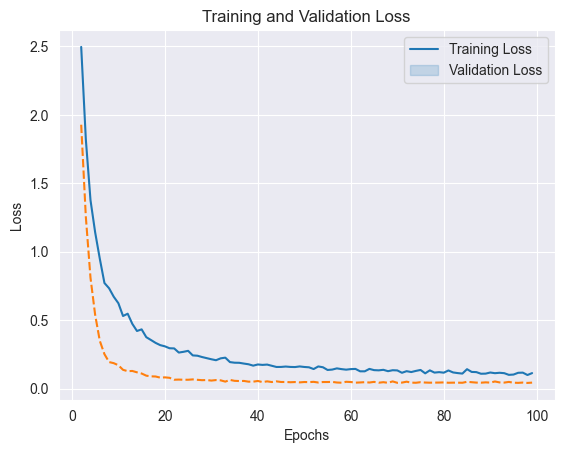

In [8]:
# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Set the style to darkgrid
sns.set_style('darkgrid')

# Plot the training and validation loss using Seaborn, starting from the 5th epoch
sns.lineplot(data=history_df.loc[2:, ['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [5]:
#### Custom predictor function
def custom_predictor(input_data):
    """
    This function takes a DataFrame input_data with the same structure as the training data (except 'GPA' and 'GradeClass')
    and returns the predicted GPA.
    """
    input_data_processed = preprocessor.transform(input_data)
    predictions = model.predict(input_data_processed)
    return predictions

# Example usage of the custom predictor
# Create a sample input data for prediction (you can replace this with actual test data)
sample_input = pd.DataFrame({
    'Age': [18],
    'Gender': [1],
    'Ethnicity': [1],
    'ParentalEducation': [1],
    'StudyTimeWeekly': [10],
    'Absences': [5],
    'Tutoring': [1],
    'ParentalSupport': [0],
    'Extracurricular': [0],
    'Sports': [0],
    'Music': [1],
    'Volunteering': [0]
})

# Get the prediction for the sample input
predicted_gpa = custom_predictor(sample_input)
print(f'Predicted GPA: {predicted_gpa[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted GPA: 2.846311092376709
